# ST2 Viral Propagation - An introduction to Random Graphs
Friday, January 19th 2024

## Introduction

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import igraph as ig

## The Erdos-Reny Model

In [14]:
g1 = ig.Graph()

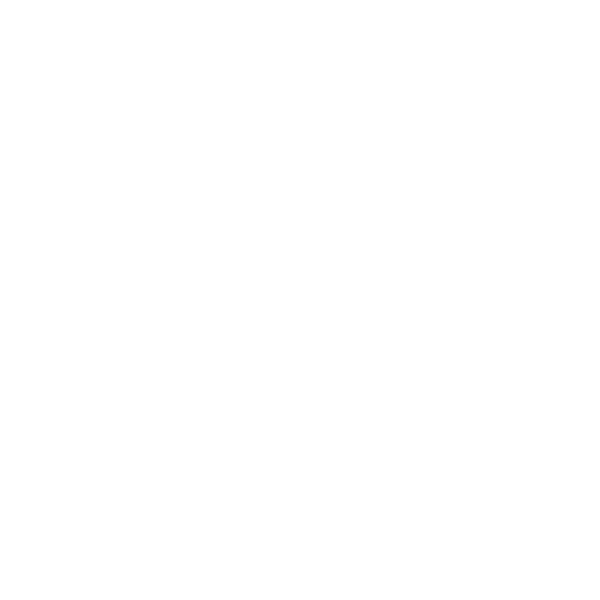

In [15]:
ig.plot(g1)

In [16]:
N = 10

In [17]:
g1.add_vertices(N)

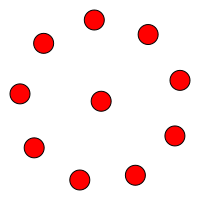

In [18]:
ig.plot(g1,bbox=(200,200))

In [19]:
help(g1.add_vertices)

Help on method _add_vertices in module igraph.basic:

_add_vertices(n, attributes=None) method of igraph.Graph instance
    Adds some vertices to the graph.
    
    Note that if C{n} is a sequence of strings, indicating the names of the
    new vertices, and attributes has a key C{name}, the two conflict. In
    that case the attribute will be applied.
    
    @param n: the number of vertices to be added, or the name of a single
      vertex to be added, or a sequence of strings, each corresponding to the
      name of a vertex to be added. Names will be assigned to the C{name}
      vertex attribute.
    @param attributes: dict of sequences, all of length equal to the
      number of vertices to be added, containing the attributes of the new
      vertices. If n is a string (so a single vertex is added), then the
      values of this dict are the attributes themselves, but if n=1 then
      they have to be lists of length 1.



In [21]:
for i in range(N):
    for j in range(i):
        if rd.randint(0,1) == 1:
            g1.add_edges([(i,j)])

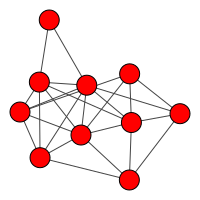

In [22]:
ig.plot(g1,bbox=(200,200))

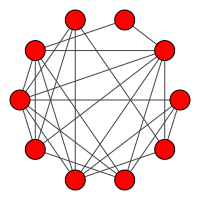

In [23]:
ig.plot(g1,bbox=(200,200),layout='circle')

In [24]:
print(g1)

IGRAPH U--- 10 25 --
+ edges:
 0 --  1  2  3  5             4 --  2  5  6  7  9          8 --  6  9
 1 --  0  3  7  9             5 --  0  2  3  4  6  7  9    9 --  1  2  3  4  5
6  8
 2 --  0  4  5  6  9          6 --  2  3  4  5  8  9
 3 --  0  1  5  6  7  9       7 --  1  3  4  5


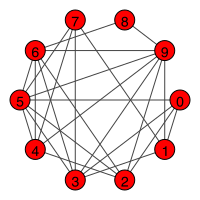

In [25]:
ig.plot(g1,bbox=(200,200),layout='circle',vertex_label=range(N))

In [26]:
g2 = ig.Graph.Erdos_Renyi(N,0.5)

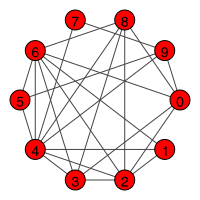

In [27]:
ig.plot(g2,bbox=(200,200),layout='circle',vertex_label=range(N))

In [39]:
g3 = ig.Graph.Erdos_Renyi(10000,0.05)
#ig.plot(g3,bbox=(300,300))

(array([  2.,   3.,   5.,   5.,  14.,   7.,  18.,  28.,  36.,  56.,  70.,
        102., 123., 180., 220., 229., 322., 340., 376., 389., 456., 656.,
        571., 580., 564., 555., 539., 472., 568., 401., 365., 320., 261.,
        239., 210., 221., 121., 110.,  72.,  56.,  41.,  37.,  25.,  11.,
          8.,   5.,   3.,   4.,   3.,   1.]),
 array([423.  , 426.14, 429.28, 432.42, 435.56, 438.7 , 441.84, 444.98,
        448.12, 451.26, 454.4 , 457.54, 460.68, 463.82, 466.96, 470.1 ,
        473.24, 476.38, 479.52, 482.66, 485.8 , 488.94, 492.08, 495.22,
        498.36, 501.5 , 504.64, 507.78, 510.92, 514.06, 517.2 , 520.34,
        523.48, 526.62, 529.76, 532.9 , 536.04, 539.18, 542.32, 545.46,
        548.6 , 551.74, 554.88, 558.02, 561.16, 564.3 , 567.44, 570.58,
        573.72, 576.86, 580.  ]),
 <BarContainer object of 50 artists>)

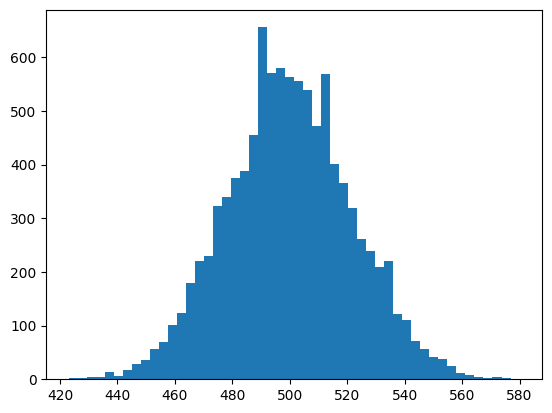

In [57]:
plt.hist(g3.degree(),bins=50)

## The Barabasi-Albert Model

In [61]:
n0 = 4
m0 = 4

t = 0
ba = ig.Graph.Erdos_Renyi(n0,m=m0)

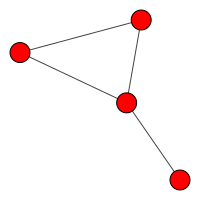

In [62]:
ig.plot(ba,bbox=(200,200))

In [ ]:
def iteration():

    global t, n0, m, ba
    
    vertices_to_chose_from = ba.vs.indices
    k_total = sum([ba.degree(i) for i in vertices_to_chose_from])

    ba.add_vertices(1)
    new_vertex = n0+t
    connections  = 0
    
    while connections < min(m,n0+t):
    
        vertex = rd.choice(vertices_to_chose_from)
        k_vertex = ba.degree(vertex)
    
        if np.random.uniform() < k_vertex / k_total :
            ba.add_edges([(new_vertex,vertex)])
            vertices_to_chose_from.remove(vertex)
            connections = connections + 1

    t = t+1